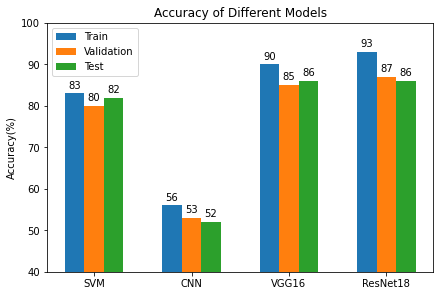

In [4]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ("SVM", "CNN", "VGG16","ResNet18")
penguin_means = {
    'Train': (83, 56, 90,93),
    'Validation': (80, 53, 85,87),
    'Test': (82, 52, 86,86),
}

x = np.arange(len(species))  # the label locations
width = 0.20  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy(%)')
ax.set_title('Accuracy of Different Models')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left')
ax.set_ylim(40, 100)

plt.show()

In [ ]:
#import sys 
#import os

#os.system("pause")

#Svm 训练：
import sys
import os
import cv2
import numpy as np
import re

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import time
import pickle

In [ ]:
# train set
train_feature_list = list()
train_label_list   = list()
train_tmpt_list    = list()

readfile1 = open('/Users/wangsuran/Desktop/data/TrainLabel.txt','r')
while True:
    line = readfile1.readline().strip() 
    if line:
        train_tmpt_list.append(line) #将顺序的label临时放在list中
    else:
        break
readfile1.close()

In [ ]:
SHAPE = (30, 30)
def extractFeaturesFromImage(image_file):
    img = cv2.imread(image_file)
    img = cv2.resize(img, SHAPE, interpolation = cv2.INTER_CUBIC)
    img = img.flatten()
    img = img / np.mean(img)
    return img

regex=re.compile(r'\d+')  # 抓取第几个图片 
  
train_images = os.listdir("/Users/wangsuran/Desktop/data/train_img")
for image in train_images:
    i = int(regex.findall(image)[0]) # 抓取第i个图片
    train_label_list.append(train_tmpt_list[i-1])  # 在label list里放入正确的label
    train_feature_list.append(extractFeaturesFromImage("/Users/wangsuran/Desktop/data/train_img/" + image))
print("ok")

In [ ]:
# test set
test_feature_list = list()
test_label_list   = list()
test_tmpt_list    = list()

readfile2 = open('/Users/wangsuran/Desktop/data/TestLabel.txt','r')
while True:
    line = readfile2.readline().strip() 
    if line:
        test_tmpt_list.append(line) #将顺序的label临时放在list中
    else:
        break
readfile2.close()

In [ ]:
test_images = os.listdir("/Users/wangsuran/Desktop/data/test_img")
for image in test_images:
    i = int(regex.findall(image)[0])# 抓取第i个图片
    test_label_list.append(test_tmpt_list[i-1])  # 在label list里放入正确的label
    test_feature_list.append(extractFeaturesFromImage("/Users/wangsuran/Desktop/data/test_img/" + image))
print("ok")

In [ ]:
# whole train set
'''
if os.path.isfile("svm_model.pkl"):
        svm = pickle.load(open("/Users/wangsuran/Desktop/svm_model.pkl", "rb"))
else:
        svm = SVC(kernel='rbf',gamma=0.001)
        svm.fit(train_feature_list, train_label_list)
        pickle.dump(svm, open("/Users/wangsuran/Desktop/svm_model.pkl", "wb"))
print("ok")
'''

In [ ]:
# demo
import time
demo_feature_list = train_feature_list[:5000]
demo_label_list   = train_label_list[:5000]

#if os.path.isfile("svm_model.pkl"):
        #svm = pickle.load(open("/Users/wangsuran/Desktop/svm_model.pkl", "rb"))
#else:

# build svm model
start = time.clock()  

svm = SVC(kernel='rbf',gamma=0.001)
svm.fit(demo_feature_list, demo_label_list)
pickle.dump(svm, open("/Users/wangsuran/Desktop/svm_model.pkl", "wb"))
print("model is ready")

middle = time.clock()

# accuracy rate calculate
right = 0
total = 0
for x, y in zip(test_feature_list, test_label_list):
    x = x.reshape(1, -1)
    prediction = svm.predict(x)[0]
    if y == prediction:
        right += 1
    total += 1

accuracy = float(right) / float(total)*100

end = time.clock()

print(total)
print(right)
print ("accuracy:" + str(accuracy) + "%")
print("success")

print("model time:",middle-start,"s")
print("test time:",end-middle,"s")

In [ ]:
### Result ###
# 5000 png
# model time: 188.27204500000062 s 
# test time: 282.9460919999992 s 
# Accuracy Rate:49.144%
# Right Prediction:6143

# 10000 png
# model time:613.5925 s = 10min
# test time:460.297464 s = 7min
# Accuracy Rate:53.703999999%
# Right Prediction:6713/12500

# 30000 png
# model time: 4377.415004 s = 73min
# test time: 1516.1060749999997 s = 25min
# Accuracy Rate:60.136%
# Right Prediction:7517/12500

# 65000 png
# model time: 568min
# test time: 67min
# Accuracy Rate:82.658%
# Right Prediction:10375/12500